In [50]:
# libraries
from operator import itemgetter
from IPython.display import display_html
from math import sqrt

import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import folium
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# betweeness的就是两万多

In [59]:
G = nx.read_graphml("london.graph")
print(G)
# get 'node' attributes
list(G.nodes(data=True))[0]

Graph with 401 nodes and 467 edges


('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

## 1.3 Node Removal Analysis

In [54]:
#改变量名

# non-sequential graphs
GD_ns = G.copy()
GB_ns = G.copy()
GC_ns = G.copy()

# non-sequential graph list
G_ns_list = [GD_ns, GB_ns, GC_ns]

# sequential graphs
GD_s = G.copy()
GB_s = G.copy()
GC_s = G.copy()

# sequential graph list
G_s_list = [GD_s, GB_s, GC_s]

In [ ]:
# Global efficiency和

In [55]:
components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
avg_shortest_path = nx.average_shortest_path_length(subgraph)
print(f"The average shortest path is {avg_shortest_path}")

The average shortest path is 13.545997506234414


In [58]:
shortest_path_list = []
components_no_list = []
global_efficiency_list = []
largest_comp_size_list = []
station_removed = []

for j in range(0, 10):
    betweeness_values = [(i[1]["topological_betweeness"]) for i in GB_ns.nodes(data=True)]
    maxbet = [
        n for n in GB_ns.nodes() if GB_ns.nodes[n]["topological_betweeness"] == max(betweeness_values)
    ]
    print(f"Station removed: {maxbet}")
    station_removed.append(maxbet[0])

    # 移除拥有最大拓扑中介中心性的节点
    GB_ns.remove_nodes_from([maxbet[0]])
    print(len(list(GB_ns.nodes)))

    # 更新并计算组件数量
    components_no = nx.number_connected_components(GB_ns)
    components_no_list.append(components_no)
    print(f"Number of components {components_no}")

    # 寻找最大组件并生成子图
    components = nx.connected_components(GB_ns)
    largest_component = max(components, key=len)
    largest_subgraph = GB_ns.subgraph(largest_component)

    # 计算最大子图的全局效率
    global_efficiency = nx.global_efficiency(largest_subgraph)
    global_efficiency_list.append(global_efficiency)
    print(f"Global Efficiency: {global_efficiency}")


KeyError: 'topological_betweeness'

# Part 2: Spatial Interaction models
# III. Models and Calibration
### III.1 Spatial Interaction Models
Briefly introduce the spatial interaction models covered in the lectures using equations and defining the terms, taking particular care in explaining the role of the parameters.
#### III.1.A Unconstrained Model

Unconstrained Model is a spatial interaction model that predicts the flow of people, goods or information between two points or nodes only based on size and distance. *Unconstrained* models are not limited by the capcity of the destination or the number of people or goods sent from the origin

*Below are the two forms the Unconstrained Spatial Interaction Model can take:*

\begin{equation} \
T_{ij} = k \frac{O_i^\alpha  D_j^\gamma}{ d_{ij}^\beta}
\end{equation}

*OR*

\begin{equation} \
T_{ij} = k O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}

The above equations defines the flow of people or goods (*Tij*) between points *i* and *j*. Using the emissivity of the Origin, denoted as *O* and attractiveness Destination, *D*. There are several parameters ($k$, $\alpha$, $\gamma$ and $β$) used in this equation which are outlined.

- $\beta$ refers to the how sensative the person or good is to travelling marginal distance.
- $\alpha$ refers to the emissivity of the origin. This is the willingness of the population to travel from the destination.
- $\gamma$ refers to the attractiveness or *pull* of the destination.
- $k$ is the general scaling parameter. This is a measure of the size of the model and number of people interacting in the model.

#### III.1.B Singly Constrained Spatial Interaction Models

Singly constrained spatial interaction models modify the unconstrained approach by incorporating constraints on either the total outflows from origins (production-constrained) or the total inflows to destinations (attraction-constrained). These models are essential for estimating interactions between locations, such as the flow of goods, people, or information, under specific limitations.

#### III.1.B.1 Singly Origin-Constrained Model (Production-Constrained)

In a production-constrained model, the total outflows from each origin are fixed. The model is represented as:

$$
T_{ij} = A_i O_i D_j^\gamma d_{ij}^{-\beta} \tag{1}
$$

- **$A_i$** is the origin-specific balancing factor, ensuring that the sum of predicted flows from origin $i$ matches the observed outflows.
- **$O_i$** represents the total observed outflows from origin $i$.
- The model predicts flows $T_{ij}$, adjusting them according to destination attractiveness $D_j$, distance $d_{ij}$, and the parameters $\gamma$ and $\beta$.

#### Variables and Parameters

- **$T_{ij}$**: Interaction flow from origin $i$ to destination $j$.
- **$A_i$**: Balancing factor for origin $i$.
- **$O_i$**: Total outflow from origin $i$.
- **$D_j$**: Attractiveness of destination $j$.
- **$d_{ij}$**: Distance between $i$ and $j$.
- **$\gamma$, $\beta$**: Parameters influencing the effect of $D_j$ and $d_{ij}$.

#### III.1.B.2 Singly Destination-Constrained Model (Attraction-Constrained)

Conversely, in an attraction-constrained model, the total inflows to each destination are fixed. This model can be similarly formulated but includes a balancing factor $B_j$ for each destination to ensure the sum of inflows matches observed data.

Both models serve to provide a more realistic representation of spatial interactions by accounting for the limitations in capacity or demand at either origins or destinations. They are particularly useful in transportation planning, urban development, and resource distribution analysis, offering insights into how constraints at either end of the flow affect overall spatial interaction patterns.

#### III.1.C Doubly Constrained Spatial Interaction Model

The doubly constrained spatial interaction model is described by the following equation:

$$
T_{ij} = A_i O_i B_j D_j^\gamma d_{ij}^{-\beta} \tag{1}
$$

#### Variables and Parameters

- $T_{ij}$: The flow of interactions (e.g., people, goods, information) from origin $i$ to destination $j$.
- $A_i$: The origin-specific balancing factor, adjusted to ensure that the total outflows from origin $i$ match the observed outflows.
- $O_i$: The total observed outflow of interactions from origin $i$.
- $B_j$: The destination-specific balancing factor, adjusted to ensure that the total inflows to destination $j$ match the observed inflows.
- $D_j$: The attractiveness measure or size of destination $j$.
- $d_{ij}$: The distance between origin $i$ and destination $j$, representing the cost or difficulty of moving between them.
- $\gamma$: The parameter controlling the influence of the attractiveness of destination $j$.
- $\beta$: The distance decay parameter, indicating how the interaction between $i$ and $j$ decreases with increasing distance.

#### Balancing Factors $A_i$ and $B_j$

The balancing factors are determined iteratively to ensure that the model respects both the observed total outflows from each origin and the observed total inflows to each destination:

$$
A_i = \frac{1}{\sum_j B_j D_j^\gamma d_{ij}^{-\beta}} \tag{2}
$$

$$
B_j = \frac{1}{\sum_i A_i O_i d_{ij}^{-\beta}} \tag{3}
$$

#### Implementation Considerations

The doubly constrained model addresses the limitations of simpler models by ensuring that both the supply side (origins) and demand side (destinations) constraints are satisfied, reflecting more realistic scenarios where both origins and destinations have capacity or budget constraints.

The iterative calculation of $A_i$ and $B_j$ requires an initial estimation followed by successive adjustments until the model predictions adequately fit the observed data, making it a more comprehensive but computationally intensive approach compared to singly constrained models.

This model is widely used in transportation planning, migration studies, and urban planning to predict flows of people, goods, or information between spatially distributed points, accounting for both origin and destination constraints.

### III.2 Model Selection & Calibration 
#### III.2.A Explore & Process London Flows Dataset
Section III.2.A will explore and preprocess the london_flows.csv data. By transforming the dataset into a matrix, we can see the substantial number of 0s in the *flows* column. These are largely explained by 0 station-to-station flows and Battersea Park, a station that was not operational when this data was collected. This is likely due to limited service and closure during the rennovation of the Batterseas Power Station complex.

The following code identifies and removes the 0s from the csv file.


In [1]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [2]:
# flows data
data = pd.read_csv("london_flows.csv")
data.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [3]:
# check csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [4]:
# define r^2 and RMSE calculations
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(np.sqrt(res.mean()), 3)
    
    return RMSE

## Production-constrained Model


\begin{equation}  \tag{1}
T_{ij} = A_i O_i D_j^\gamma d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation}  \tag{2}
O_i = \sum_j T_{ij}
\end{equation}

and

\begin{equation}  \tag{3}
A_i = \frac{1}{\sum_j D_j^\gamma d_{ij}^{-\beta}}
\end{equation}

Considering many 0s in the Battersea Park, I decided to delete all the rows and columns contains Battersea Park.

In [5]:
#改一下，用老师代码修改
#Calculate log of destination employment count with small addition to solve div by zero error
data['log_dest_jobs'] = np.log(data['jobs'] + 0.001)

#create the formula (the "-1" indicates no intercept in the regression model).
prodsim_formula_exp = 'flows ~ station_origin + log_dest_jobs + distance -1' 

#run a production constrained sim
prodsim_exp = smf.glm(formula = prodsim_formula_exp, data=data, family=sm.families.Poisson()).fit()
#print the summary
print(prodsim_exp.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.2195e+05
Date:                Fri, 05 Apr 2024   Deviance:                   1.6717e+06
Time:                        21:37:29   Pearson chi2:                 2.42e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [6]:
#create some Oi and Dj columns in the dataframe and store row and column flowss in them:
#to create O_i, take datasub ...then... group by origin ...then... summarise by calculating the sum of flows
O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
data = data.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
data = data.merge(D_j, on = "station_destination", how = "left" )

/tmp/ipykernel_99385/1999392237.py:3: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
/tmp/ipykernel_99385/1999392237.py:7: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))


In [7]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodsim_exp.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "", regex=True)
#then once you have done this you can join them back into the dataframes
data = data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
#check this has worked
data.head()

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022


In [8]:
alpha_i = prodsim_exp.params[:-2]
gamma = prodsim_exp.params[-2]
beta = - prodsim_exp.params[-1]
print(alpha_i)
print('The Gamma parameter:' , gamma)
print('The Beta parameter:' , beta)

station_origin[Abbey Road]         -2.881022
station_origin[Acton Central]      -1.147704
station_origin[Acton Town]         -1.600213
station_origin[Aldgate]            -2.912650
station_origin[Aldgate East]       -2.824608
                                      ...   
station_origin[Wood Street]        -0.927397
station_origin[Woodford]           -0.628676
station_origin[Woodgrange Park]    -0.881062
station_origin[Woodside Park]      -1.145098
station_origin[Woolwich Arsenal]    0.535720
Length: 399, dtype: float64
The Gamma parameter: 0.7509085100795874
The Beta parameter: 0.00015081738474355153


/tmp/ipykernel_99385/4216866947.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = prodsim_exp.params[-2]
/tmp/ipykernel_99385/4216866947.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = - prodsim_exp.params[-1]


And we're ready to generate our estimates:

In [9]:
data["prodsimest1"] = np.exp(data["alpha_i"]+gamma*data["log_dest_jobs"] 
                                 - data["distance"]*beta)
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,77.979903
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,1.506097
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,4.180041
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,99.274167
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,55.954205
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096722,599,1208,-2.881022,4.218713
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739338,599,845,-2.881022,4.966668
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,599,1748,-2.881022,4.232938
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745238,599,850,-2.881022,3.316400
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415099,599,611,-2.881022,3.815783


In [10]:
#first round the estimates
data["prodsimest1"] = round(data["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
datamat1 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
datamat1

/tmp/ipykernel_99385/2589366907.py:4: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat1 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_99385/2589366907.py:4: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat1 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_99385/2589366907.py:4: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3745.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2884.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,31.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3099.0


In [11]:
CalcRSquared(data["flows"], data["prodsimest1"])

0.44827596164751926

In [12]:
CalcRMSE(data["flows"], data["prodsimest1"])

97.845

# Scenario A (Practical 3

In [13]:
# define new jobs column
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 1/2 * row['jobs']
    else:
        val = row["jobs"]
    return val
        
data["Jobs_ScenarioA"] = data.apply(new_job, axis =1)
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1,Jobs_ScenarioA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,78.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,2.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,4.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,99.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,56.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096722,599,1208,-2.881022,4.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739338,599,845,-2.881022,5.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,599,1748,-2.881022,4.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745238,599,850,-2.881022,3.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415099,599,611,-2.881022,4.0,611.0


In [14]:
# check 
data.loc[data['station_destination'] == 'Canary Wharf']

,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1,Jobs_ScenarioA
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,99.0,29386.0
126,Acton Town,Canary Wharf,57,3745,58772,20398.165882,10.981421,3745,58772,-1.600213,35.0,29386.0
348,Aldgate,Canary Wharf,1,2886,58772,6564.419680,10.981421,2886,58772,-2.912650,77.0,29386.0
595,Aldgate East,Canary Wharf,3,3172,58772,5127.998899,10.981421,3172,58772,-2.824608,104.0,29386.0
817,All Saints,Canary Wharf,67,740,58772,1340.088733,10.981421,740,58772,-2.844358,181.0,29386.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60595,Wood Green,Canary Wharf,64,6667,58772,16849.246595,10.981421,6667,58772,-1.047705,105.0,29386.0
60838,Wood Lane,Canary Wharf,0,1088,58772,17092.091760,10.981421,1088,58772,-3.185043,12.0,29386.0
61062,Woodford,Canary Wharf,192,4868,58772,13963.787075,10.981421,4868,58772,-0.628676,247.0,29386.0
61294,Woodside Park,Canary Wharf,42,3093,58772,22356.567178,10.981421,3093,58772,-1.145098,42.0,29386.0


You will notice that by increasing the average salary in Barking and Dagenham, we’ve increased flows into Barking and Dagenham, but have not reduced the flows into other zones - the original constraints are still working on the other zones. One way to get around this, now that we have calibrated our parameters, is to return to the multiplicative model in Equation 1 and run this model after calculating our own $A_i$ balancing factors.

In [16]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = data["Jobs_ScenarioA"]**gamma
dist_beta = np.exp(data['distance']*(-beta))
#calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

/tmp/ipykernel_99385/2257990744.py:7: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))


So that is it for calculating your $A_i$ values. Now you have these, it’s very simple to plug everything back into Equation 1 and generate some estimates…

In [17]:
data["prodsimest2"] = data["A_i2"]*data["O_i"]*Dj2_gamma*dist_beta
#round
data["prodsimest2"] = round(data["prodsimest2"])
#check
data[["prodsimest1", "prodsimest2"]]

,prodsimest1,prodsimest2
0,78.0,84.0
1,2.0,2.0
2,4.0,4.0
3,99.0,63.0
4,56.0,60.0
...,...,...
61469,100.0,108.0
61470,296.0,320.0
61471,36.0,39.0
61472,125.0,135.0


In [35]:
#Matrix View (Code Taken from Practical 3)
datamat2 = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
datamat2

/tmp/ipykernel_99385/2553696429.py:2: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat2 = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_99385/2553696429.py:2: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat2 = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_99385/2553696429.py:2: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,602.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,14.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3746.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2880.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4858.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0
Woodside Park,NaN,NaN,2.0,20.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3098.0


# Scenario B (Practical

In [25]:
#改一下alpha_i_partial_b1的名字，因为跟上面的不一致，改代码结构

#Establish new value for beta - reflecting cost of travel (in terms of distance)
print("Default Beta: " + str(beta))

#Given that beta is relatively small, I will consider a scenario in which beta is 50% larger and 100% larger from its default value
beta_b1 = beta*1.5
beta_b2 = beta*2

#Calculate flows using 'raw' equation

#Recalculate A_i such that flows between other stations are recalibrated correctly
Dj2_gamma = data["jobs"]**gamma
dist_decay_b1 = np.exp(data['distance']*(-beta_b1))
dist_decay_b2 = np.exp(data['distance']*(-beta_b2))

#Recalculate alpha_i for scenario a
data["alpha_i_partial_b1"] = Dj2_gamma * dist_decay_b1
data["alpha_i_partial_b2"] = Dj2_gamma * dist_decay_b2

#Sum over all destinations
A_i_b1 = pd.DataFrame(data.groupby(["station_origin"])["alpha_i_partial_b1"].agg(np.sum))
A_i_b2 = pd.DataFrame(data.groupby(["station_origin"])["alpha_i_partial_b2"].agg(np.sum))

#Divide over 1
A_i_b1["alpha_i_partial_b1"] = 1/A_i_b1["alpha_i_partial_b1"]
A_i_b2["alpha_i_partial_b2"] = 1/A_i_b2["alpha_i_partial_b2"]

#Rename
A_i_b1.rename(columns={"alpha_i_partial_b1":"alpha_i_sec_b1"}, inplace=True)
A_i_b2.rename(columns={"alpha_i_partial_b2":"alpha_i_sec_b2"}, inplace=True)

#and write the A_i values back into the dataframe
data = data.merge(A_i_b1, left_on="station_origin", right_index=True, how="left")
data = data.merge(A_i_b2, left_on="station_origin", right_index=True, how="left")

#Calculate new flows for scenario b1
data["flows_scenario_b1"] = np.round(data["alpha_i_sec_b1"]*data["population"]*Dj_gamma*dist_decay_b1)

#Calculate new flows for scenario b2
data["flows_scenario_b2"] = np.round(data["alpha_i_sec_b2"]*data["population"]*Dj_gamma*dist_decay_b2)

data.head(50)

Default Beta: 0.00015081738474355153


/tmp/ipykernel_99385/954019323.py:20: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i_b1 = pd.DataFrame(data.groupby(["station_origin"])["alpha_i_partial_b1"].agg(np.sum))
/tmp/ipykernel_99385/954019323.py:21: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i_b2 = pd.DataFrame(data.groupby(["station_origin"])["alpha_i_partial_b2"].agg(np.sum))


,station_origin,station_destination,flows,population,jobs,distance,log_dest_jobs,O_i,D_j,alpha_i,...,alpha_i_partial_b1,alpha_i_partial_b2,alpha_i_sec_b1_x,alpha_i_sec_b2_x,flows_scenario_b1,flows_scenario_b2,alpha_i_sec_b1_y,alpha_i_sec_b2_y,alpha_i_sec_b1,alpha_i_sec_b2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,599,78549,-2.881022,...,753.166005,407.930978,0.000123,0.000155,55.0,38.0,0.000123,0.000155,0.000123,0.000155
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091312,599,442,-2.881022,...,14.137134,7.441466,0.000123,0.000155,1.0,1.0,0.000123,0.000155,0.000123,0.000155
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499789,599,665,-2.881022,...,56.072215,42.179687,0.000123,0.000155,4.0,4.0,0.000123,0.000155,0.000123,0.000155
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,599,58772,-2.881022,...,1206.332683,822.026645,0.000123,0.000155,89.0,76.0,0.000123,0.000155,0.000123,0.000155
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,599,15428,-2.881022,...,843.428862,712.938656,0.000123,0.000155,62.0,66.0,0.000123,0.000155,0.000123,0.000155
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096722,599,1208,-2.881022,...,45.437299,27.443105,0.000123,0.000155,3.0,3.0,0.000123,0.000155,0.000123,0.000155
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739338,599,845,-2.881022,...,66.376504,49.745290,0.000123,0.000155,5.0,5.0,0.000123,0.000155,0.000123,0.000155
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,599,1748,-2.881022,...,39.751601,20.934159,0.000123,0.000155,3.0,2.0,0.000123,0.000155,0.000123,0.000155
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745238,599,850,-2.881022,...,36.137247,22.081652,0.000123,0.000155,3.0,2.0,0.000123,0.000155,0.000123,0.000155
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415099,599,611,-2.881022,...,50.484924,37.456591,0.000123,0.000155,4.0,3.0,0.000123,0.000155,0.000123,0.000155


In [27]:
#Matrix View (Code Taken from Practical 3)
datamat3 = data.pivot_table(values ="flows_scenario_b1", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
datamat3

/tmp/ipykernel_99385/1031132805.py:2: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat3 = data.pivot_table(values ="flows_scenario_b1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_99385/1031132805.py:2: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat3 = data.pivot_table(values ="flows_scenario_b1", index="station_origin", columns = "station_destination",
/tmp/ipykernel_99385/1031132805.py:2: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To 

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,8.0,8.0,NaN,20.0,0.0,NaN,11.0,...,9.0,2.0,1.0,26.0,NaN,0.0,NaN,0.0,NaN,3744.0
Aldgate,NaN,NaN,1.0,NaN,46.0,NaN,NaN,0.0,NaN,29.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2875.0
Aldgate East,NaN,NaN,1.0,50.0,NaN,NaN,0.0,0.0,NaN,31.0,...,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,36.0,51.0,NaN,NaN,NaN,NaN,23.0,...,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,1.0,16.0,15.0,NaN,0.0,NaN,NaN,32.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [28]:
#Matrix View (Code Taken from Practical 3)
datamat4 = data.pivot_table(values ="flows_scenario_b2", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
datamat4

/tmp/ipykernel_99385/400475793.py:2: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat4 = data.pivot_table(values ="flows_scenario_b2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_99385/400475793.py:2: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  datamat4 = data.pivot_table(values ="flows_scenario_b2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_99385/400475793.py:2: FutureWarning: The provided callable <function sum at 0x7f2ee802e0c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To kee

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1222.0
Acton Town,NaN,NaN,NaN,4.0,4.0,NaN,26.0,0.0,NaN,6.0,...,5.0,1.0,0.0,30.0,NaN,0.0,NaN,0.0,NaN,3739.0
Aldgate,NaN,NaN,0.0,NaN,55.0,NaN,NaN,0.0,NaN,30.0,...,0.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2880.0
Aldgate East,NaN,NaN,0.0,60.0,NaN,NaN,0.0,0.0,NaN,31.0,...,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,26.0,41.0,NaN,NaN,NaN,NaN,14.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,0.0,11.0,10.0,NaN,0.0,NaN,NaN,28.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3087.0


# Analysis

### Compare with the Frobenius norm and the numbers of stations changed

In [94]:
# Replace NAs to 0
df1 = datamat1.fillna(0)  #Production constrained model
df2 = datamat2.fillna(0)  #Scenario A
df3 = datamat3.fillna(0)  #Scenario B1
df4 = datamat4.fillna(0)  #Scenario B2

In [95]:
# Convert the df to array
datamat1_array = np.array(df1)
datamat2_array = np.array(df2)
datamat3_array = np.array(df3)
datamat4_array = np.array(df4)

In [40]:
# 计算Scenario A, B1, B2与Production Constrained model之间的Frobenius范数差异
fro_norm_A = np.linalg.norm(datamat2_array - datamat1_array, 'fro')
fro_norm_B1 = np.linalg.norm(datamat3_array - datamat1_array, 'fro')
fro_norm_B2 = np.linalg.norm(datamat4_array - datamat1_array, 'fro')

print(f"Frobenius norm difference between Scenario A and Production Constrained model: {fro_norm_A}")
print(f"Frobenius norm difference between Scenario B1 and Production Constrained model: {fro_norm_B1}")
print(f"Frobenius norm difference between Scenario B2 and Production Constrained model: {fro_norm_B2}")

Frobenius norm difference between Scenario A and Production Constrained model: 18789.38423685034
Frobenius norm difference between Scenario B1 and Production Constrained model: 9072.542091387617
Frobenius norm difference between Scenario B2 and Production Constrained model: 20271.032040821206


In [103]:
#Change Analysis for the 3 Scenarios

def calculate_and_sort_top_changes(df1, df2):
    # 删除最后一行和最后一列
    df1_adjusted = df1.iloc[:-1, :-1]
    df2_adjusted = df2.iloc[:-1, :-1]

    # 计算调整后的DataFrame之间的差异
    difference_matrix_adjusted = df2_adjusted - df1_adjusted

    # 将差异矩阵中的NaN值填充为0
    difference_matrix_filled_adjusted = difference_matrix_adjusted.fillna(0)

    # 找出变化量最大的Top 10
    flattened_diff_adjusted = difference_matrix_filled_adjusted.values.flatten()
    top_10_indices_adjusted = np.argsort(np.abs(flattened_diff_adjusted))[-10:]
    num_rows_adjusted, num_cols_adjusted = difference_matrix_filled_adjusted.shape
    top_10_rows_adjusted = top_10_indices_adjusted // num_cols_adjusted
    top_10_cols_adjusted = top_10_indices_adjusted % num_cols_adjusted

    # 获取站点名称（删除了最后一个总计的站点）
    stations_adjusted = difference_matrix_filled_adjusted.columns

    # 准备数据以填充新的DataFrame
    data_adjusted = {
        'Station Origin': [stations_adjusted[row] for row in top_10_rows_adjusted],
        'Station Destination': [stations_adjusted[col] for col in top_10_cols_adjusted],
        'Change Amount': [difference_matrix_filled_adjusted.values[row, col] for row, col in zip(top_10_rows_adjusted, top_10_cols_adjusted)]
    }

    # 创建调整后的DataFrame
    top_changes_df_adjusted = pd.DataFrame(data_adjusted)

    # 按Change Amount列的绝对值大小排序，但保持原始的正负符号
    top_changes_df_adjusted_sorted = top_changes_df_adjusted.loc[top_changes_df_adjusted['Change Amount'].abs().sort_values(ascending=False).index]

    return top_changes_df_adjusted_sorted

# 计算每个场景的变化并保存结果
df_changes_a = calculate_and_sort_top_changes(df1, df2)
df_changes_b1 = calculate_and_sort_top_changes(df1, df3)
df_changes_b2 = calculate_and_sort_top_changes(df1, df4)

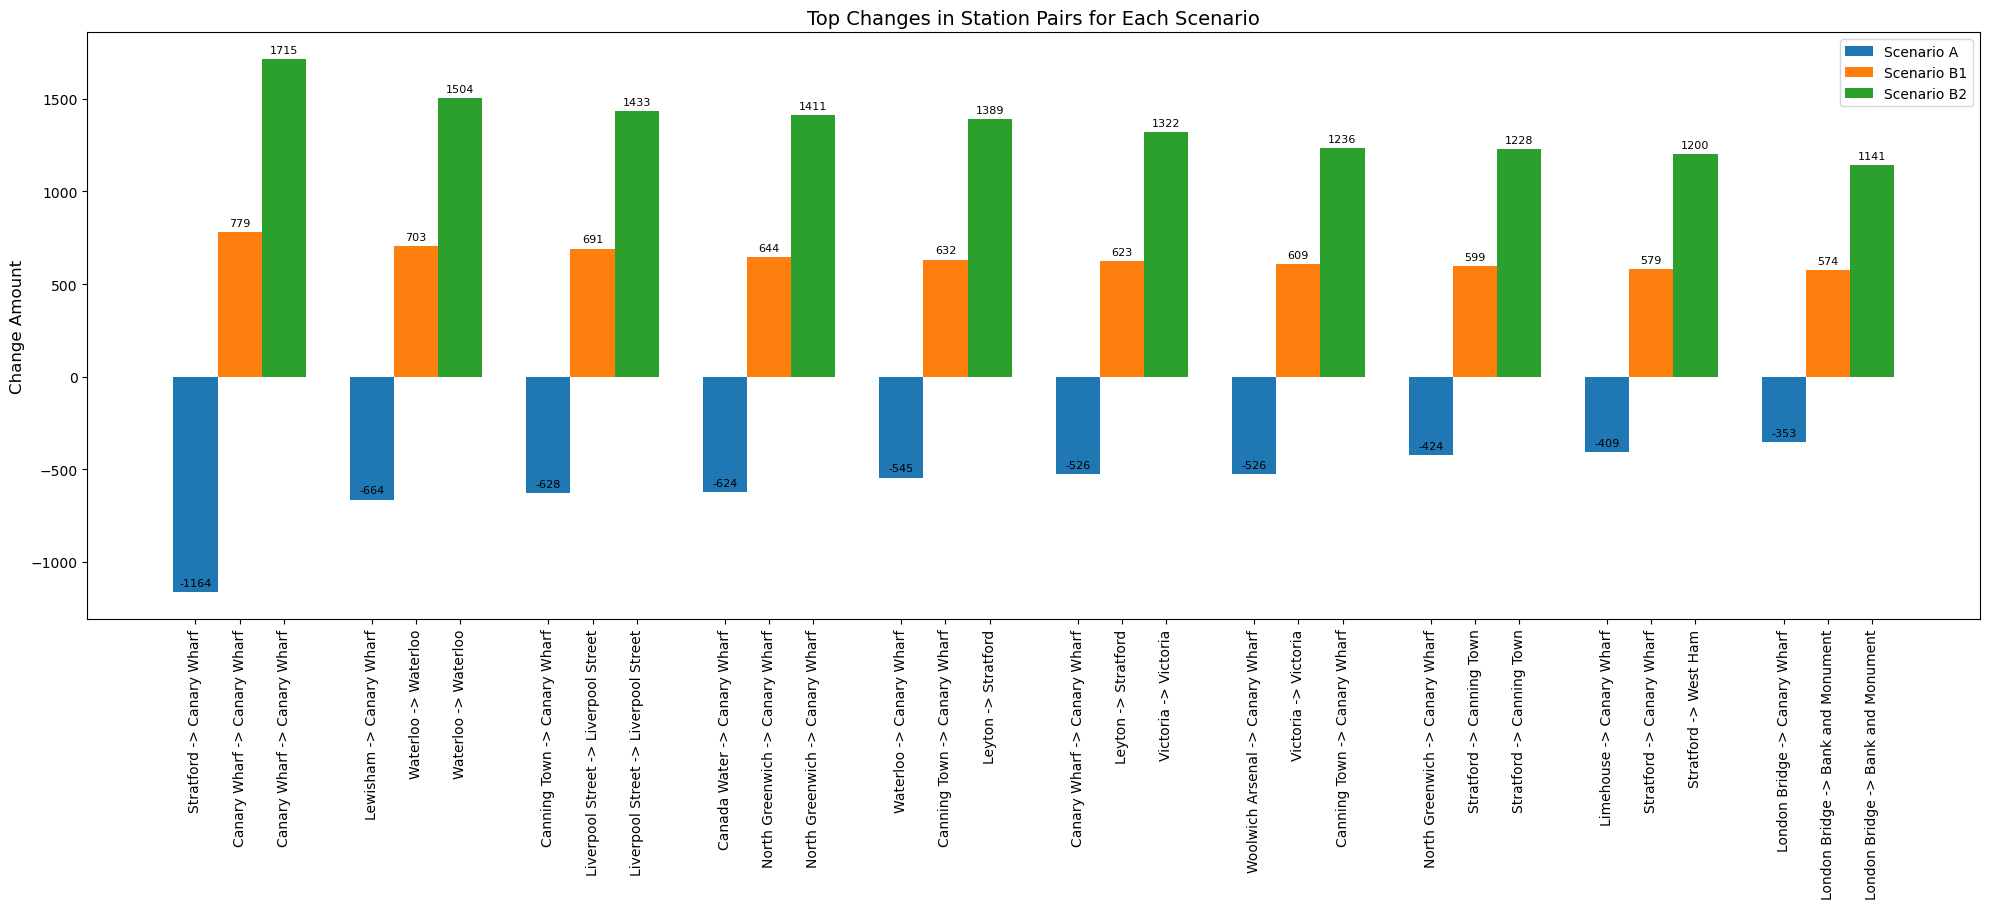

In [113]:
# 生成每个场景的站点对
station_pairs_a = df_changes_a['Station Origin'] + ' -> ' + df_changes_a['Station Destination']
station_pairs_b1 = df_changes_b1['Station Origin'] + ' -> ' + df_changes_b1['Station Destination'] 
station_pairs_b2 = df_changes_b2['Station Origin'] + ' -> ' + df_changes_b2['Station Destination']

# 创建一个空的DataFrame来组合所有信息
combined_df = pd.DataFrame(index=range(10))
combined_df['Scenario A'] = df_changes_a['Change Amount'].values
combined_df['Scenario B1'] = df_changes_b1['Change Amount'].values  
combined_df['Scenario B2'] = df_changes_b2['Change Amount'].values

# 绘图
fig, ax = plt.subplots(figsize=(20, 10))

# 定义柱子的宽度
bar_width = 0.25

# 获得每个Scenario的数据长度
n = len(combined_df)

# 创建每个Scenario柱子的x轴位置
x_a = np.arange(n)
x_b1 = x_a + bar_width
x_b2 = x_b1 + bar_width

# 绘制每个Scenario的柱状图
bars_a = ax.bar(x_a, combined_df['Scenario A'], width=bar_width, label='Scenario A', color='#1f77b4')
bars_b1 = ax.bar(x_b1, combined_df['Scenario B1'], width=bar_width, label='Scenario B1', color='#ff7f0e')
bars_b2 = ax.bar(x_b2, combined_df['Scenario B2'], width=bar_width, label='Scenario B2', color='#2ca02c')

# 在柱状图上方添加数据标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(bars_a)
autolabel(bars_b1)
autolabel(bars_b2)

# 合并所有场景的x轴位置和站点对
x_ticks = np.concatenate((x_a, x_b1, x_b2))
x_labels = station_pairs_a.tolist() + station_pairs_b1.tolist() + station_pairs_b2.tolist()

# 设置x轴刻度和标签
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90, fontsize=10)

# 添加y轴标签和图表标题
ax.set_ylabel('Change Amount', fontsize=12)
ax.set_title('Top Changes in Station Pairs for Each Scenario', fontsize=14)

# 添加图例
ax.legend(fontsize=10)

# 调整图表布局
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # 调整图表的上下左右边距

plt.savefig("Part2_Analysis.png", dpi = 600)
# 显示图表
plt.show()